In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

import random as rand
np.random.seed(1234)

In [2]:
# Scipy_Statistics
import scipy.stats as stats
import scipy.optimize as opt

In [3]:
# Gaussian Function
def gauss(x, mean, sigma):
    c = 1/(sigma*np.sqrt(2*np.pi))
    return c*np.exp(-(x - mean)**2/(2*sigma**2))

In [4]:
def matplot_hist(x, title='True Dist.', norm=False):
    n, bin_edges,_ = plt.hist(x, 20, density=norm, facecolor='y', alpha=0.75, label=r'$f(x)$')
    bins = 0.5*(bin_edges[1:] + bin_edges[:-1])
    plt.title(title)
    plt.xlabel('bins')
    plt.ylabel('counts')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return n, bins

In [5]:
def numpy_hist(bins, hist, title='True Dist.'):
    plt.bar(bins, hist, color='y', edgecolor=None, alpha=0.75, label=r"Histogram $f(x)$")
    plt.title(title)
    plt.xlabel('bins')
    plt.ylabel('counts')
    plt.grid(False)
    plt.legend()
    plt.show()

In [6]:
# from Ques 2.a Discretize True Data
mu, sigma = 5.04, 2.12

In [7]:
t = stats.norm.rvs(loc=5, scale=2.0, size=10000)
s = stats.norm.rvs(loc=mu, scale=sigma, size=10000)

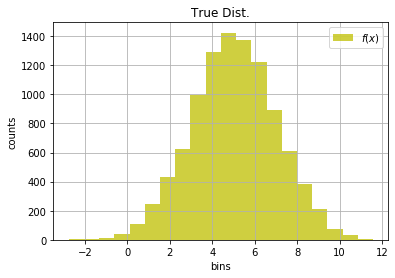

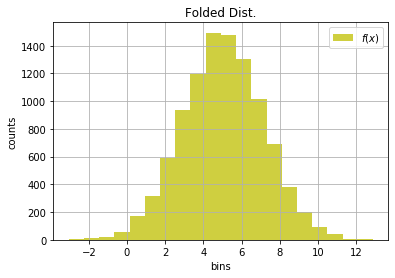

In [8]:
_,_ = matplot_hist(t, title='True Dist.')
_,_ = matplot_hist(s, title='Folded Dist.')

In [9]:
# Discretize: Histogram
n_t, bin_edges = np.histogram(t, bins=20, density=False)
bins_t = 0.5*(bin_edges[1:] + bin_edges[:-1])

n_s, bin_edges = np.histogram(s, bins=20, density=False)
bins_s = 0.5*(bin_edges[1:] + bin_edges[:-1])

In [10]:
# Corrected real data
C = n_t/n_s
n_c = C * n_t

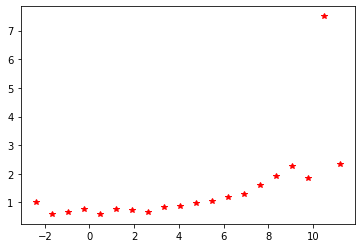

In [11]:
plt.plot(bins_t, C, 'r*', label='correction factors')

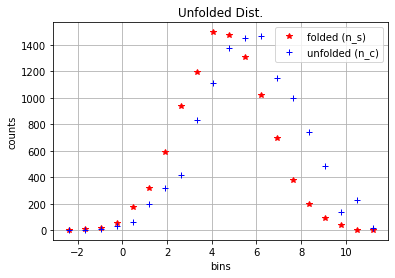

In [12]:
# plot both observed and corrected sample
plt.plot(bins_t, n_s, 'r*', label='folded (n_s)')
plt.plot(bins_t, n_c, 'b+', label='unfolded (n_c)')
plt.title(r'Unfolded Dist.')
plt.xlabel('bins')
plt.ylabel('counts')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
# uncertainities (bin content is taken by Poisson Distribution...)
errors_nc = C*np.sqrt(n_t)

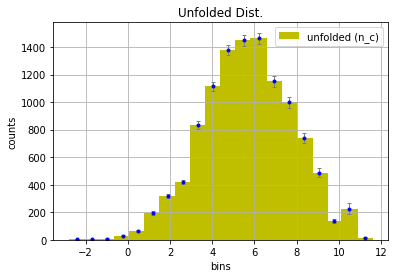

In [14]:
plt.figure()
#plt.plot(bins_s, n_c, 'b+', label='unfolded (n_c)')
plt.bar(bins_t, n_c, color='y', label='unfolded (n_c)')
plt.errorbar(x=bins_t, y=n_c, yerr=errors_nc, fmt='.b', ecolor='gray', elinewidth=1, capsize=2)
plt.title(r'Unfolded Dist.')
plt.xlabel('bins')
plt.ylabel('counts')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
#Fitting the Data_Normalized...
n_t, bin_edges = np.histogram(t, bins=20, density=True)
bins_t = 0.5*(bin_edges[1:] + bin_edges[:-1])

n_s, bin_edges = np.histogram(s, bins=20, density=True)
bins_s = 0.5*(bin_edges[1:] + bin_edges[:-1])

In [16]:
C = n_t/n_s
n_c = C * n_t

In [17]:
# curve_fit(), non-linear LS
popt, pcov = opt.curve_fit(gauss, xdata=bins_t, ydata=n_c)
pdf = stats.norm.pdf(x=bins_t, loc=popt[0], scale=popt[1])

In [18]:
print("mu: ", popt[0], "sigma: ", popt[1])

mu:  5.695868981153415 sigma:  1.8907666454121224


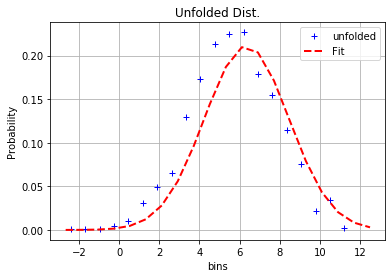

In [19]:
plt.plot(bins_t, n_c, 'b+', label='unfolded')
plt.plot(bins_s, pdf, 'r--', linewidth=2, label='Fit')
plt.title(r'Unfolded Dist.')
plt.xlabel('bins')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()